In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

In [2]:
df = pd.read_excel("Assignment_Dataset.xlsx")
df

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


In [3]:
# Function to dynamically calculate the target budget PR for each day
def calculate_target_pr(start_date, current_date, initial_pr=73.9, reduction_rate=0.6):
    # Calculate the number of full years since the start date
    full_years_since_start = current_date.year - start_date.year
    # Adjust for the start month if current date is before the start date's month
    if current_date.month < start_date.month or (current_date.month == start_date.month and current_date.day < start_date.day):
        full_years_since_start -= 1
    # Calculate the new target PR after the annual reduction
    new_target_pr = initial_pr - (full_years_since_start * reduction_rate)
    return new_target_pr


In [4]:
# Color coding based on GHI values
def get_color_for_ghi(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

In [5]:
# Ensure Date is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the 30-day moving average for PR
df['30d_moving_avg'] = df['PR'].rolling(window=30).mean()

# Calculate the target PR for each date
df['target_pr'] = df.index.map(lambda date: calculate_target_pr(df.index[0], date))

# Apply the color coding function for GHI
df['color'] = df['GHI'].apply(get_color_for_ghi)

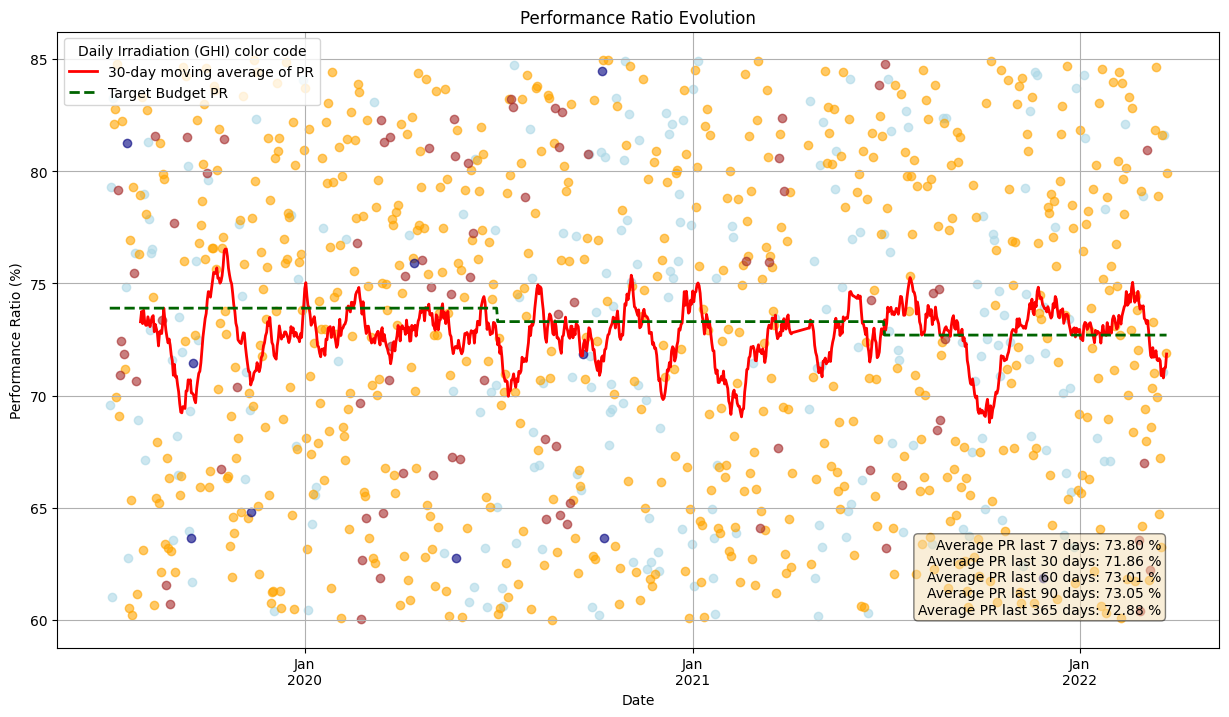

In [6]:
# Start plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the PR values with color coding
for color in df['color'].unique():
    idx = df['color'] == color
    ax.scatter(df.index[idx], df['PR'][idx], color=color, alpha=0.6)

# Plot the 30-day moving average of PR
ax.plot(df.index, df['30d_moving_avg'], color='red', linewidth=2, label='30-day moving average of PR')

# Plot the dynamic target PR line
ax.plot(df.index, df['target_pr'], color='darkgreen', linewidth=2, linestyle='--', label='Target Budget PR')

# Format the date on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Set axis labels and graph title
ax.set_xlabel('Date')
ax.set_ylabel('Performance Ratio (%)')
ax.set_title('Performance Ratio Evolution')

# Add legend for color coding
ax.legend(title='Daily Irradiation (GHI) color code')

# Set grid
ax.grid(True)

# Calculate the average PR for last 7, 30, 60 days, and so on.
def rolling_avg_days(days):
    return df['PR'].iloc[-days:].mean()

# Display the averages on the graph
avg_7 = rolling_avg_days(7)
avg_30 = rolling_avg_days(30)
avg_60 = rolling_avg_days(60)
avg_90 = rolling_avg_days(90)
avg_365 = rolling_avg_days(365)

# Add text box for rolling averages
textstr = '\n'.join((
    f'Average PR last 7 days: {avg_7:.2f} %',
    f'Average PR last 30 days: {avg_30:.2f} %',
    f'Average PR last 60 days: {avg_60:.2f} %',
    f'Average PR last 90 days: {avg_90:.2f} %',
    f'Average PR last 365 days: {avg_365:.2f} %',
))

# Place a text box in bottom right in axes coords
ax.text(0.95, 0.05, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show the plot
plt.show()

In [8]:
# Save the generated graph to a file
output_file_path = 'performance_ratio_evolution.png'
fig.savefig(output_file_path)

# Provide the path to the saved file
output_file_path


'performance_ratio_evolution.png'